In [1]:
# @title Google Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pandas with new line delimited JSON

In [2]:
import pandas as pd

In [3]:
df_j = pd.read_json("/content/drive/MyDrive/bq-results-20230308-204000-1678308030674/bq-results-20230308-204000-1678308030674.json", lines = True) 

In [4]:
df_j.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,user_pseudo_id,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform,user_ltv,event_bundle_sequence_id,event_server_timestamp_offset
0,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
1,20180701,1530484288504003,user_engagement,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
2,20180701,1530493994131017,post_score,"[{'key': 'level_name', 'value': {'string_value...",1.529931e+15,525E3BEE74AD824923CC04FE45E45B40,"[{'key': 'ad_frequency', 'value': {'string_val...",1473814855637000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
3,20180701,1530494095262011,post_score,"[{'key': 'level_name', 'value': {'string_value...",1.530494e+15,525E3BEE74AD824923CC04FE45E45B40,"[{'key': 'ad_frequency', 'value': {'string_val...",1473814855637000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
4,20180701,1530494234072011,post_score,"[{'key': 'level_name', 'value': {'string_value...",1.530494e+15,525E3BEE74AD824923CC04FE45E45B40,"[{'key': 'ad_frequency', 'value': {'string_val...",1473814855637000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN


#Calculating how many people come from which country using country info

In [5]:
# Filtering for 1st screen view event of the user
df_minsv = df_j[df_j["event_name"] == "screen_view"].groupby("user_pseudo_id")["event_timestamp"].min()
df_minsv = pd.DataFrame(df_minsv).reset_index()

# Join with main table to get all columns
df_uft = df_j.merge(df_minsv, left_on=["user_pseudo_id", "event_timestamp"], right_on=["user_pseudo_id", "event_timestamp"])

In [13]:
# Exploring the geo column

df_uft['geo'][19]

{'continent': 'Americas', 'country': 'United States'}

In [24]:
# define a function to extract the country value from each row
def extract_country(row):
    return row['geo']['country']

# apply the function to each row and create a new 'country' column
df_country = df_uft['country'] = df_uft.apply(extract_country, axis=1)

In [27]:
# Converts a pandas series object to a pandas dataframe with a single column named

df_series_to_frame = df_country.to_frame().rename(columns={0: 'country'})

In [31]:
# Joining two dataframes

joined_df = pd.merge(df_uft, df_series_to_frame, on='country', how='left')
joined_df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,user_pseudo_id,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform,user_ltv,event_bundle_sequence_id,event_server_timestamp_offset,country
0,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN,United States
1,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN,United States
2,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN,United States
3,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN,United States
4,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN,United States


In [37]:
# Selecting columns for analysis

selected_columns = ['event_date', 'event_timestamp', 'user_pseudo_id', 'platform', 'user_ltv', 'country']

joined_df = joined_df.loc[:, selected_columns]
joined_df.head()

,event_date,event_timestamp,user_pseudo_id,platform,user_ltv,country
0,20180701,1530484313289000,0AF67C1A1C8F3785609B4210C3E04FC8,ANDROID,NaN,United States
1,20180701,1530484313289000,0AF67C1A1C8F3785609B4210C3E04FC8,ANDROID,NaN,United States
2,20180701,1530484313289000,0AF67C1A1C8F3785609B4210C3E04FC8,ANDROID,NaN,United States
3,20180701,1530484313289000,0AF67C1A1C8F3785609B4210C3E04FC8,ANDROID,NaN,United States
4,20180701,1530484313289000,0AF67C1A1C8F3785609B4210C3E04FC8,ANDROID,NaN,United States


In [41]:
# Extract hour detail from timestamp - unix time stamp converter function/library

import datetime

def get_hour_from_timestamp(timestamp):

    # Convert microseconds to seconds and convert to datetime object
    dt_object = datetime.datetime.fromtimestamp(timestamp / 1000000.0)
    
    # Extract the hour from the datetime object
    hour = dt_object.hour
    
    return hour

# Apply the get_hour_from_timestamp() function to the event_timestamp column
joined_df['hour'] = joined_df['event_timestamp'].apply(get_hour_from_timestamp)

# Drop the 'event_timestamp' column
joined_df = joined_df.drop(columns=['event_timestamp'])

In [69]:
# Group by country and count unique user_pseudo_id values
df_country_counts = joined_df.groupby('country')['user_pseudo_id'].nunique()

# Converts a pandas series object to a pandas dataframe with a single column named
df_series_to_frame_c = df_country_counts.to_frame().rename(columns={0: 'country_counts'})

# Sort the dataframe in descending order
df_series_to_frame_c = df_series_to_frame_c.sort_values(by='user_pseudo_id', ascending=False)
df_series_to_frame_c.head()

,user_pseudo_id
country,
United States,1316
Japan,80
Canada,74
Australia,62
United Kingdom,54


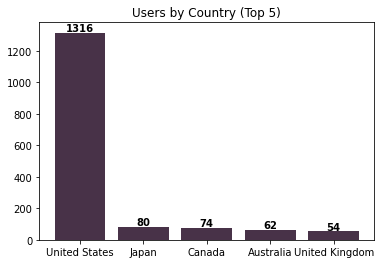

In [82]:
import matplotlib.pyplot as plt

# Select only the top 20 countries based on the user_pseudo_id values
df_top_5 = df_series_to_frame_c.nlargest(5, 'user_pseudo_id')

# Create a bar chart of the user_pseudo_id values for each country
plt.bar(df_top_5.index, df_top_5['user_pseudo_id'], color='#483248')

# Set the title and axis labels for the plot
plt.title('Users by Country (Top 5)')

# Add text labels to the top of each bar
for i, v in enumerate(df_top_5['user_pseudo_id']):
    plt.text(i, v+10, str(v), ha='center', fontweight='bold')

# Show the plot
plt.show()

#Calculating how many individuals utilize the application on an hourly basis

In [83]:
# Selecting columns without dictionary

# Create a list of columns to drop
cols_to_drop = ['event_params', 'user_properties', 'device', 'geo', 'app_info', 'traffic_source']

# Select all columns except those to drop
df_uft = df_uft.drop(cols_to_drop, axis=1)

In [ ]:
# How many people viewed the screen within a day? - groupby event date count user id

# df_uft = df_uft.groupby('event_date')['user_pseudo_id'].nunique()

In [ ]:
# Extract hour detail from timestamp - unix time stamp converter function/library

import datetime

def get_hour_from_timestamp(timestamp):

    # Convert microseconds to seconds and convert to datetime object
    dt_object = datetime.datetime.fromtimestamp(timestamp / 1000000.0)
    
    # Extract the hour from the datetime object
    hour = dt_object.hour
    
    return hour

# Apply the get_hour_from_timestamp() function to the event_timestamp column
df_uft['hour'] = df_uft['event_timestamp'].apply(get_hour_from_timestamp)

In [ ]:
# Drop the 'event_timestamp' column
df_uft = df_uft.drop(columns=['event_timestamp'])

In [ ]:
# Group by hour and count unique user_pseudo_id values
df_hourly_counts = df_uft.groupby('hour')['user_pseudo_id'].nunique()

<AxesSubplot:title={'center':'Hourly User Count'}, xlabel='hour'>

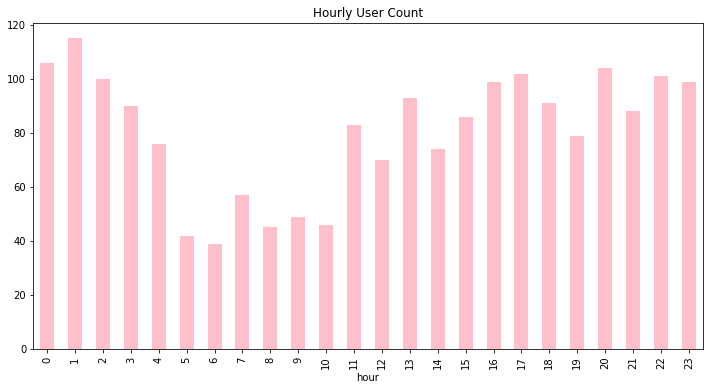

In [ ]:
# Visualize the hourly count data
df_hourly_counts.plot(kind='bar', figsize=(12, 6), title='Hourly User Count', color='pink')


#Polars

Polars can speed up data calculations.

In [ ]:
!pip install polars

In [ ]:
import polars as pl

In [ ]:
df_pl = pl.read_ndjson("/content/drive/MyDrive/bq-results-20230308-204000-1678308030674/bq-results-20230308-204000-1678308030674.json")

In [ ]:
df_pl.head()